# Import libs and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
df = pd.read_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/egg_price_eu.csv', index_col=0)

In [3]:
df.head()

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
217,218,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2020-07-19
416,417,Andorra,Hen eggs in shell (12),2.35,2.52,7.23,€,1.50-3.60,2020-07-19
792,793,Martinique,Hen eggs in shell (12),3.94,3.94,0.00,€,2.97-4.85,2020-04-05
819,820,Andorra,Hen eggs in shell (12),2.35,2.35,0.00,€,1.50-3.60,2020-04-05
928,929,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2021-04-04


# Reprocess data to meet k-means algorithm

In [4]:
# Remove categorical columns and non-related columns
df_ee = df.drop(columns = ['_id','country','food_type','local_currency','local_range','date'])

In [5]:
df_ee.columns

Index(['baseline_local', 'local_price', 'variation_local'], dtype='object')

# kmeans algorithm

## The elbow technique

In [6]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [7]:
score = [kmeans[i].fit(df_ee).score(df_ee) for i in range(len(kmeans))]
score

[-20489.1185822511,
 -11509.974118612075,
 -5250.441661454973,
 -2865.836532265713,
 -1899.5523127892477,
 -1485.5648291418938,
 -1154.0443081625606,
 -963.240266159505,
 -828.6830069662686]

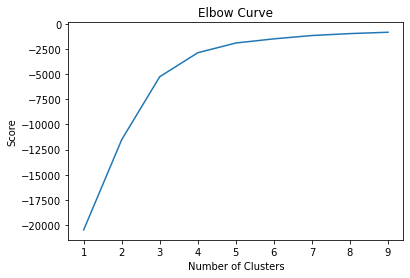

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the graph above, the optimal clusters number could be 4.

# kmeans clusters

In [9]:
kmeans = KMeans(n_clusters = 4) 

In [10]:
kmeans.fit(df_ee)

KMeans(n_clusters=4)

In [11]:
df_ee['clusters'] = kmeans.fit_predict(df_ee)

In [12]:
df_ee.head()

,baseline_local,local_price,variation_local,clusters
217,3.94,4.25,7.87,0
416,2.35,2.52,7.23,0
792,3.94,3.94,0.00,1
819,2.35,2.35,0.00,1
928,3.94,4.25,7.87,0


In [13]:
df_ee['clusters'].value_counts()

1    225
0    197
2     31
3      9
Name: clusters, dtype: int64

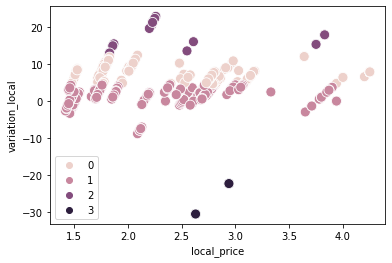

In [14]:
# Plot the clusters for the "variation_local" and "local_price" variables.

ax = sns.scatterplot(x=df_ee['local_price'], y=df_ee['variation_local'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.

In [15]:
df_ee.groupby('clusters').agg({'baseline_local':['mean', 'median'], 
                         'local_price':['mean', 'median'], 
                         'variation_local':['mean', 'median']})

baseline_local        local_price        variation_local       
                   mean median        mean median            mean median
clusters                                                                
0              2.392944   2.35    2.576853   2.52        7.809137   7.87
1              2.304622   2.29    2.338356   2.37        1.407778   1.97
2              2.460645   2.25    2.897419   2.55       17.818065  17.85
3              3.780000   3.78    2.836667   2.94      -24.953333 -22.22

# Thoughts about clusters

## Clusters graph in local price and variation is clear but cannot explain the situation. Perhaps we should try another algorithm to figure their relationship.

In [16]:
#export the dataset with clusters.
df_ee.to_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/egg_price_eu_cluster.csv')